Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   667 non-null    object 
 1   account length          667 non-null    int64  
 2   area code               667 non-null    int64  
 3   international plan      667 non-null    object 
 4   voice mail plan         667 non-null    object 
 5   number vmail messages   667 non-null    int64  
 6   total day minutes       667 non-null    float64
 7   total day calls         667 non-null    int64  
 8   total day charge        667 non-null    float64
 9   total eve minutes       667 non-null    float64
 10  total eve calls         667 non-null    int64  
 11  total eve charge        667 non-null    float64
 12  total night minutes     667 non-null    float64
 13  total night calls       667 non-null    int64  
 14  total night charge   

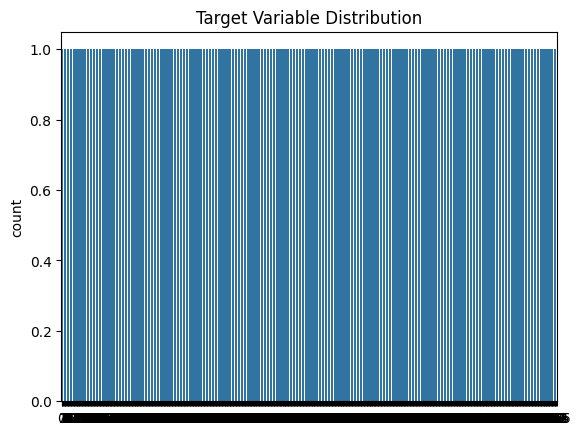

ValueError: could not convert string to float: 'LA'

<Figure size 1000x600 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

# 1. Exploratory Data Analysis (EDA)
def perform_eda(df):
    
    print("Dataset Information:")
    print(df.info())
    print("\nDataset Description:")
    print(df.describe())

    
    print("\nMissing Values per Column:")
    print(df.isnull().sum())

    
    if 'churn' in df.columns:
        sns.countplot(df['churn'])
        plt.title("Target Variable Distribution")
        plt.show()

    
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

# 2. Preprocessing: Handling missing values, encoding, scaling
def preprocess_data(df):
    
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

   
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  
        ('scaler', StandardScaler())                 
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  
        ('encoder', OneHotEncoder(handle_unknown='ignore'))    
    ])

    
    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

    return preprocessor


def churn_prediction_metrics(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocess data
    preprocessor = preprocess_data(X)

   
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])

    
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

    # Classification report and confusion matrix
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# 4. Putting Everything Together: EDA + Preprocessing + Model Building
def full_pipeline(dataset_path):

    df = pd.read_csv(dataset_path)

  
    perform_eda(df)

    
    if 'churn' not in df.columns:
        raise ValueError("The dataset does not contain a 'churn' column.")

   
    X = df.drop(columns='churn')
    y = df['churn']

    
    churn_prediction_metrics(X, y)


dataset_path = r"/Users/selva/Developer/ML/Suervy /generic-churn-prediction/data/orange_telecom.csv"  
full_pipeline(dataset_path)